In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

plt.rcParams.update(
    {
        "axes.titlesize": 24,  # Title font size
        "axes.labelpad": 10,  # Padding for the x and y labels
        "axes.labelcolor": "dimgray",
        "xtick.labelsize": 16,  # Font size for the x tick labels
        "ytick.labelsize": 16,  # Font size for the y tick labels
        "axes.labelsize": 20,  # Font size for the x and y axis labels
        "font.family": "serif",  # Set the font family to Arial
        "grid.linestyle": "--",  # Set the style of the gridlines
        "grid.linewidth": 0.5,  # Set the width of the gridlines
        "grid.color": "gray",  # Set the color of the gridlines
        "axes.grid": True,  # Enable the grid
        "axes.grid.which": "both",  # Apply the grid to both major and minor ticks
        "xtick.direction": "in",  # Set the direction of the x tick marks
        "ytick.direction": "in",  # Set the direction of the y tick marks
        "xtick.major.size": 6,  # Set the length of the major x tick marks
        "xtick.major.width": 2,  # Set the width of the major x tick marks
        "ytick.major.size": 6,  # Set the length of the major y tick marks
        "ytick.major.width": 2,  # Set the width of the major y tick marks
        "xtick.color": "gray",  # Color of x tick labels and tick lines
        "ytick.color": "gray",  # Color of y tick labels and tick lines
    }
)


In [61]:
df = pd.read_excel("Shoreline Change.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year + (df['Date'].dt.dayofyear - 1) / 365
years = df['Year'].values
year_pairs = [f"{int(year)} - {int(years[i+1])}" for i, year in enumerate(years[:-1])]
table_data = pd.DataFrame({
    'Time Period': year_pairs,
    'Rate of Shoreline \n Change (m/yr)': df["Rate of Change (m/yr)"].dropna()
})


table_data

<Figure size 2000x600 with 0 Axes>

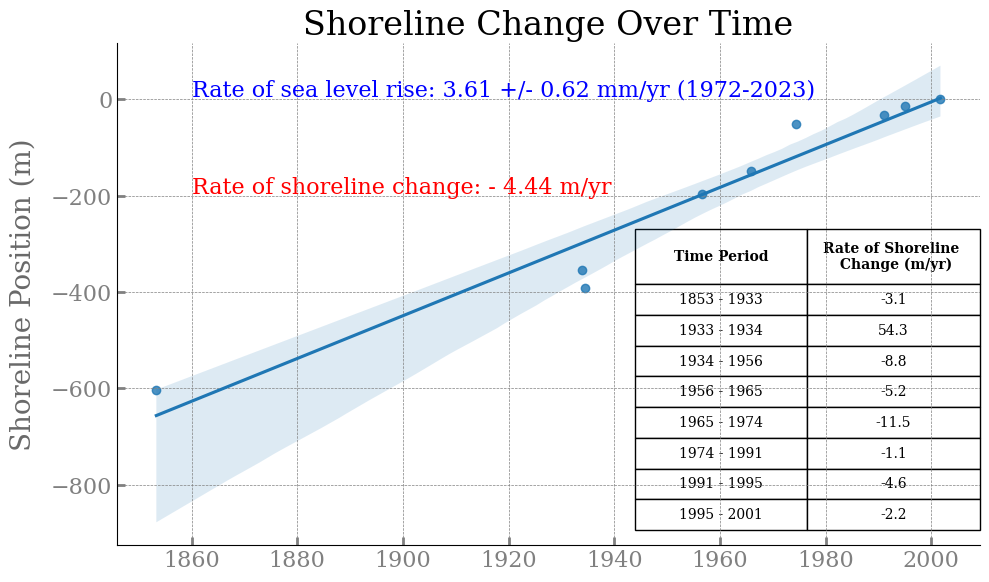

In [62]:
slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["Shoreline Change (m)"])
plt.figure(figsize=(20, 6))
sns.lmplot(data=df, x="Year", y="Shoreline Change (m)", height=6, aspect=10 / 6)
plt.text(x=1860, y=40, s="Rate of sea level rise: 3.61 +/- 0.62 mm/yr (1972-2023)", fontsize=16, color="blue", horizontalalignment="left", verticalalignment="top")
plt.text(x=1860, y=-160, s=f"Rate of shoreline change: - {slope:.2f} m/yr", fontsize=16, color="red", horizontalalignment="left", verticalalignment="top")
plt.title("Shoreline Change Over Time")
plt.ylabel("Shoreline Position (m)")
plt.xlabel("")
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom right', cellLoc='center', colWidths=[0.9, 0.9], bbox=[0.6, 0.03, 0.4, 0.6])
cellDict = table.get_celld()
for i in range(len(table_data.columns)):
    cellDict[(0, i)].set_height(.06)
    cellDict[(0, i)].set_text_props(weight='bold')
table.set_fontsize(14)
plt.savefig("Shoreline Change Over Time.png", dpi=300, bbox_inches="tight")
